# Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\Akira\Documents\Advanced Analytics and Dashboard Design Project"

In [5]:
NBA = pd.read_csv(os.path.join(path, 'Data', 'Original Data' , 'NBA.csv'),index_col = False)

# Data Cleaning

In [6]:
NBA.columns

Index(['player_name', 'team_abbreviation', 'Team City', 'Team_State', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [7]:
NBA.head()

,player_name,team_abbreviation,Team City,Team_State,age,player_height,player_weight,college,country,draft_year,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,Houston,Texas,22,193.04,94.800728,Louisiana State,USA,1996,...,3.9,1.5,2.4,0.3,4%,4%,4%,4%,4%,1996-97
1,Gaylon Nickerson,WAS,Washington,District of Columbia,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,...,3.8,1.3,0.3,8.9,3%,11%,17%,50%,3%,1996-97
2,George Lynch,VAN,Vancouver,Canada,26,203.20,103.418976,North Carolina,USA,1993,...,8.3,6.4,1.9,-8.2,11%,19%,18%,51%,11%,1996-97
3,George McCloud,LAL,Los Angeles,California,30,203.20,102.058200,Florida State,USA,1989,...,10.2,2.8,1.7,-2.7,3%,11%,21%,53%,3%,1996-97
4,George Zidek,DEN,Denver,Colorado,23,213.36,119.748288,UCLA,USA,1995,...,2.8,1.7,0.3,-14.1,10%,17%,20%,50%,10%,1996-97


In [8]:
NBA.shape

(12844, 23)

## Missing Values

In [11]:
# Check for missing values

NBA.isnull().sum()

# No missing values to handle: The college category missing values are those that were drafted from high school or played internationally

player_name             0
team_abbreviation       0
Team City               0
Team_State              0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

## Duplicate Check

In [13]:
dups = NBA.duplicated()

In [15]:
dups.shape

(12844,)

## Scatterplot of variables to test (player height vs pts, ast, and reb)

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


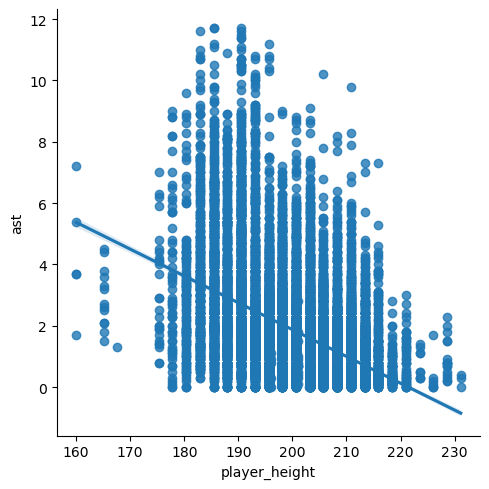

In [17]:
# height vs assists

sns.lmplot(x = 'player_height', y = 'ast', data = NBA)

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


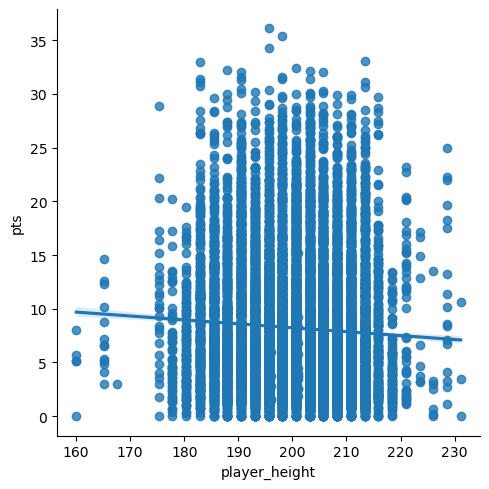

In [18]:
# height vs points

sns.lmplot(x = 'player_height', y = 'pts', data = NBA)

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


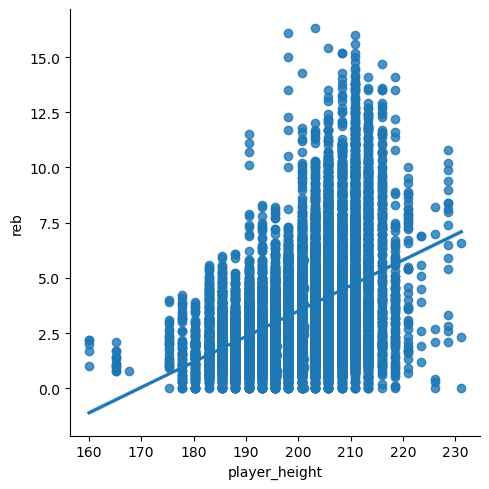

In [19]:
# height vs points

sns.lmplot(x = 'player_height', y = 'reb', data = NBA)

# Hypothesis

## In this hypothesis, I will test that players that have an increased height averages less assists in the NBA.

### Data Prep

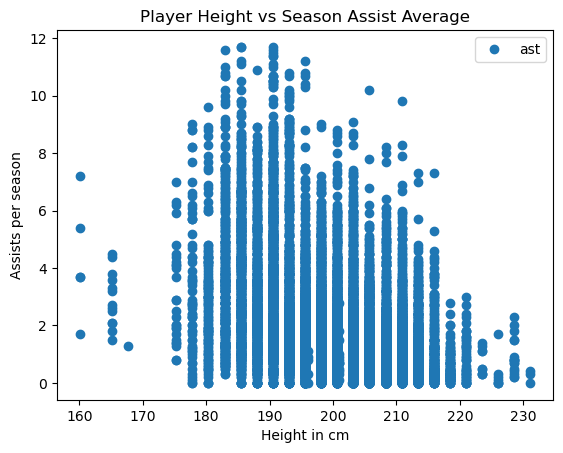

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

NBA.plot(x = 'player_height', y='ast',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Player Height vs Season Assist Average')  
plt.xlabel('Height in cm')  
plt.ylabel('Assists per season')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = NBA['player_height'].values.reshape(-1,1)
y = NBA['ast'].values.reshape(-1,1)

In [22]:
X


array([[193.04],
       [190.5 ],
       [203.2 ],
       ...,
       [205.74],
       [208.28],
       [205.74]])

In [23]:
y


array([[2.4],
       [0.3],
       [1.9],
       ...,
       [1.2],
       [0.5],
       [0.9]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis (test set)

In [25]:
# Create a regression object.

regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

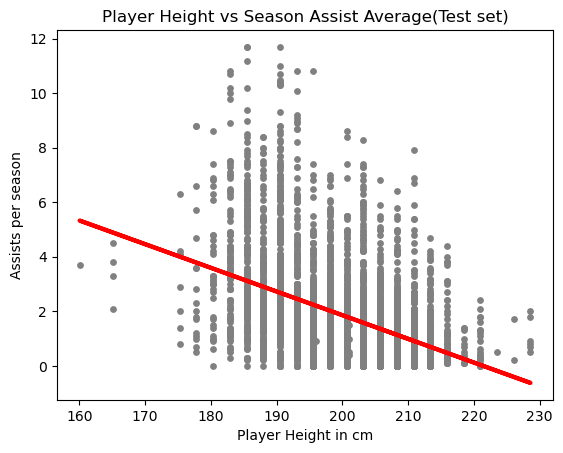

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Player Height vs Season Assist Average(Test set)')
plot_test.xlabel('Player Height in cm')
plot_test.ylabel('Assists per season')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.08687322]]
Mean squared error:  2.753514745309145
R2 score:  0.19221307782941022


In [32]:
y_predicted

array([[0.91619111],
       [1.57816504],
       [1.13684909],
       ...,
       [0.69553314],
       [1.13684909],
       [1.35750706]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.6,0.916191
1,4.3,1.578165
2,1.5,1.136849
3,0.3,1.798823
4,2.0,2.902113
5,1.2,1.798823
6,2.2,1.578165
7,7.0,3.343429
8,4.4,2.019481
9,1.5,1.578165


When testing the regression analysis with the test data, there is evidence of a declining trend between the two variables. However, when looking at the MSE and R2 data, it shows that the predicted values are off from the regression line. There was a MSE score of 2.7..., which shows that the accuracy of the regression line is off because 2.7 assists is a fairly large change. The R2 value of 0.19 means that the variance is quite large and explains that the regression line is not the best fit for this analysis. When comparing the predicted the actual vs predicted y values, it is evident that that values are different from each other.

### Regression Analysis (train set)

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.08687322]]
Mean squared error:  2.5446547215859594
R2 score:  0.1971264328511293


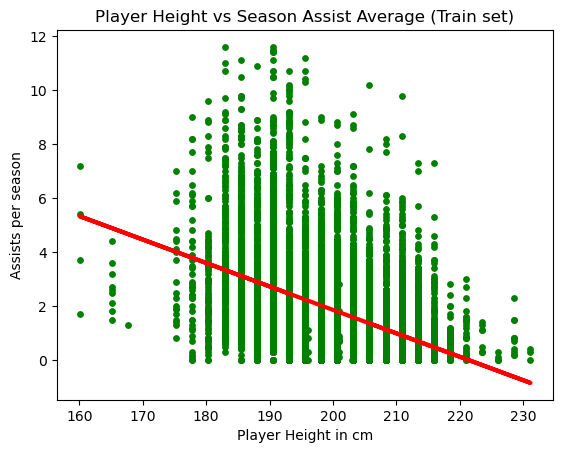

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Player Height vs Season Assist Average (Train set)')
plot_test.xlabel('Player Height in cm')
plot_test.ylabel('Assists per season')
plot_test.show()

In the regression analysis of the training data set, the slope is the same as the test set, and there is an improvement of the MSE and R2 score. However, the scores of both the accuracy and variance of the data compared to the regression line is still enough for me to say that using a regression analysis is not the most effective in giving an accurate analysis that there is a relationship between player height and assists.

### Bias discussion

Based on the regression analysis, I reflected on the results and comparing it to today's NBA trends and noticing a difference in what the data is showing. In recent years, the bigger players ( centers and power forwards) have increased their skills to pass the ball and facilitate in a way where they are focused on sharing the ball more than the past. Traditionally, bigger players were never good passers, and the offense was more focused on them instead of the guards. I can see how including data from the past is skewing the data to show that bigger players are not passing the ball. I would love to create another analysis of just the modern NBA (2010 - present) to display a more accurate data visualization of the relationship between player height and assists.